## healthcare sector

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import math

In [13]:
data.head()

,tv,bus_conf,con_cred,cpi,con_exp,ppi,vix,inv,ppe,hc_RD,health_exp,fed_cat,recession_prob,tw,fif,eig
date,,,,,,,,,,,,,,,,
2006-01-31,3.18,-0.004348,0.020198,0.005391,0.021,0.804436,-0.053707,0.034784,0.061272,116,2166,3,0.39,-0.69,-0.16,2.59
2006-02-28,-0.01,-0.004348,0.020198,0.005391,0.021,0.804436,-0.053707,0.034784,0.061272,116,2166,3,0.39,-0.01,0.12,-0.15
2006-03-31,0.23,-0.004348,0.020198,0.005391,0.021,0.804436,-0.053707,0.034784,0.061272,116,2166,3,0.54,-0.25,0.02,-0.06
2006-04-30,2.15,-0.002128,0.003369,0.016924,0.023,0.818300,0.167159,0.030595,0.026027,116,2166,3,0.22,-0.16,2.59,-0.15
2006-05-31,-0.07,-0.002128,0.003369,0.016924,0.023,0.818300,0.167159,0.030595,0.026027,116,2166,3,0.22,0.12,-0.15,-0.01


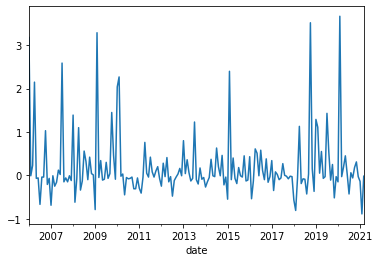

In [2]:
data = pd.read_csv('C:/Users/jtt/Desktop/hc_data.csv')
data.index = pd.to_datetime(data['date'])
data.drop(columns='date', inplace=True)
data['tv'].plot()

## 12 months

In [3]:
d12 = data.drop(['tv','fif','eig'], axis=1)
d12 = d12.dropna()
d12x = d12.drop(columns='tw')
d12y = d12.tw
i = math.floor(d12.shape[0] * 0.7)# train proportion
xtrain12 = d12x.iloc[0:i,]
xtest12 = d12x.iloc[i:,]
ytrain12 = d12y[0:i]
ytest12 = d12y[i:]
rf12 = RandomForestRegressor(random_state=42)
rf12.fit(xtrain12, ytrain12)
ypred12 = rf12.predict(xtest12)
mae12 = mean_absolute_error(ytest12, ypred12)
print(f'RF_MAE_12mths = {mae12:.4f}')

RF_MAE_12mths = 0.5016


In [4]:
scale = StandardScaler()
xtrain12_s = scale.fit_transform(xtrain12)
xtest12_s = scale.fit_transform(xtest12)
rf12_s = RandomForestRegressor(random_state=42)
rf12_s.fit(xtrain12_s, ytrain12)
ypred12_s = rf12_s.predict(xtest12_s)
mae12_s = mean_absolute_error(ytest12, ypred12_s)
print(f'RF_MAE_12mths_Scaling = {mae12_s:.4f}')

RF_MAE_12mths_Scaling = 0.4533


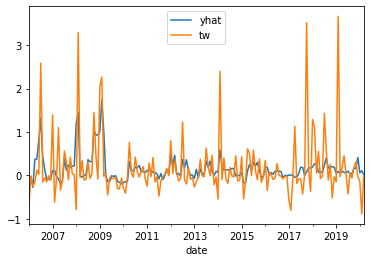

In [5]:
d12x_s = scale.fit_transform(d12x)
yhat12 = rf12_s.predict(d12x_s)
d12['yhat'] = yhat12
d12[['yhat','tw']].plot()

## 15 months 

In [6]:
d15 = data.drop(['tv','tw','eig'], axis=1)
d15 = d15.dropna()
d15x = d15.drop(columns='fif')
d15y = d15.fif
j = math.floor(d15.shape[0] * 0.7)# train proportion
xtrain15 = d15x.iloc[0:j,]
xtest15 = d15x.iloc[j:,]
ytrain15 = d15y[0:j]
ytest15 = d15y[j:]
rf15 = RandomForestRegressor(random_state=42)
rf15.fit(xtrain15, ytrain15)
ypred15 = rf15.predict(xtest15)
mae15 = mean_absolute_error(ytest15, ypred15)
print(f'RF_MAE_15mths = {mae15:.4f}')

RF_MAE_15mths = 0.4744


In [7]:
scale = StandardScaler()
xtrain15_s = scale.fit_transform(xtrain15)
xtest15_s = scale.fit_transform(xtest15)
rf15_s = RandomForestRegressor(random_state=42)
rf15_s.fit(xtrain15_s, ytrain15)
ypred15_s = rf15_s.predict(xtest15_s)
mae15_s = mean_absolute_error(ytest15, ypred15_s)
print(f'RF_MAE_15mths_Scaling = {mae15_s:.4f}')

RF_MAE_15mths_Scaling = 0.5214


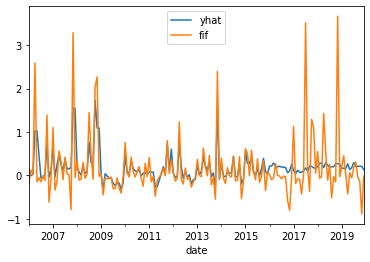

In [8]:
yhat15 = rf15.predict(d15x)
d15['yhat'] = yhat15
d15[['yhat','fif']].plot()

## 18 months

In [9]:
d18 = data.drop(['tv','tw','fif'], axis=1)
d18 = d18.dropna()
d18x = d18.drop(columns='eig')
d18y = d18.eig
k = math.floor(d18.shape[0] * 0.7)# train proportion
xtrain18 = d18x.iloc[0:k,]
xtest18 = d18x.iloc[k:,]
ytrain18 = d18y[0:k]
ytest18 = d18y[k:]
rf18 = RandomForestRegressor(random_state=42)
rf18.fit(xtrain18, ytrain18)
ypred18 = rf18.predict(xtest18)
mae18 = mean_absolute_error(ytest18, ypred18)
print(f'RF_MAE_18mths = {mae18:.4f}')

RF_MAE_18mths = 0.5303


In [10]:
scale = StandardScaler()
xtrain18_s = scale.fit_transform(xtrain18)
xtest18_s = scale.fit_transform(xtest18)
rf18_s = RandomForestRegressor(random_state=42)
rf18_s.fit(xtrain18_s, ytrain18)
ypred18_s = rf18_s.predict(xtest18_s)
mae18_s = mean_absolute_error(ytest18, ypred18_s)
print(f'RF_MAE_18mths_Scaling = {mae18_s:.4f}')

RF_MAE_18mths_Scaling = 0.5411


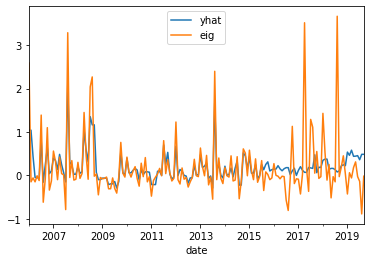

In [11]:
yhat18 = rf18.predict(d18x)
d18['yhat'] = yhat18
d18[['yhat','eig']].plot()

## prediction

In [12]:
d = data.tail(1).drop(['tv','tw','fif','eig'],axis=1)
d_s = scale.fit_transform(d)
p12 = rf12_s.predict(d_s)
p15 = rf15.predict(d)
p18 = rf18.predict(d)
print('The future 12 months EPS growth:{}'.format(p12))
print('The future 15 months EPS growth:{}'.format(p15))
print('The future 18 months EPS growth:{}'.format(p18))

The future 12 months EPS growth:[0.014035]
The future 15 months EPS growth:[0.08350167]
The future 18 months EPS growth:[0.6105]
